### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import warnings
# warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 

In [4]:
obsrv.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
obsrv.shape

(10000, 18)

In [6]:
obsrv.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
obsrv.apply(lambda x : x.nunique())

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [8]:
obsrv.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
obsrv.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [14]:
print(obsrv.groupby('class').size())

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64


### Visualize Data

In [15]:
df1 = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])
df2 = pd.DataFrame(obsrv, columns=['u','g','r','i','z', 'class'])
df3 = pd.DataFrame(obsrv, columns=['redshift','class'])

In [16]:
df1.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


In [91]:
df_gb = df1.groupby('class')
# df_gb1 = df_gb['ra'].agg([np.shape, np.mean, np.std])
# df_gb2= df_gb['dec'].agg([np.sum, np.mean, np.std])
# df_gb3 = df_gb['u'].agg([np.sum, np.mean, np.std])
# df_gb4 = df_gb['g'].agg([np.sum, np.mean, np.std])
# df_gb5 = df_gb['r'].agg([np.sum, np.mean, np.std])
# df_gb6 = df_gb['i'].agg([np.sum, np.mean, np.std])
# df_gb7 = df_gb['z'].agg([np.sum, np.mean, np.std])
# df_gb8 = df_gb['redshift'].agg([np.sum, np.mean, np.std])
# df_gb1

for x, y in df_gb:
    print(x)
    print(y.mean())
    print(y.median())
    print(y.count())

GALAXY
ra          177.333570
dec          15.764372
u            18.804339
g            17.350216
r            16.649506
i            16.272770
z            16.017923
redshift      0.080325
dtype: float64
ra          178.235210
dec           0.479262
u            18.988990
g            17.496555
r            16.741390
i            16.349395
z            16.073810
redshift      0.077330
dtype: float64
ra          4998
dec         4998
u           4998
g           4998
r           4998
i           4998
z           4998
class       4998
redshift    4998
dtype: int64
QSO
ra          177.468000
dec          20.570639
u            18.942928
g            18.678714
r            18.498535
i            18.360007
z            18.274761
redshift      1.218366
dtype: float64
ra          181.134116
dec           0.657986
u            19.088800
g            18.822220
r            18.659365
i            18.529880
z            18.457200
redshift      1.234131
dtype: float64
ra          850
dec        

In [82]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Year')

for name, group in grouped:
    print(name)
    print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


In [18]:
X = df1.ra.values.reshape(-1, 1)
y = df1.dec.values.reshape(-1, 1)

Text(0, 0.5, 'Declination')

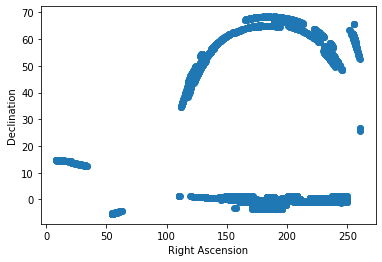

In [19]:
plt.scatter(X, y)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

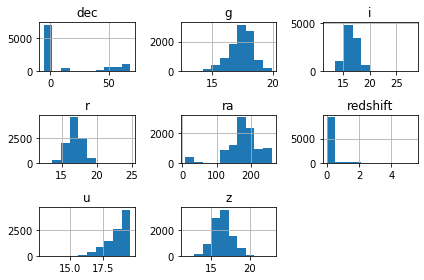

In [20]:
df1.hist()
plt.tight_layout()

field, g, i, r, ra, and z show a Gaussian distribution, which could indicate a correlation

In [ ]:
pd.plotting.scatter_matrix(df2, alpha=0.2)
# pd.plotting.scatter_matrix(df3, alpha=0.2)
# # pd.plotting.scatter_matrix(df4, alpha=0.2)

### Proprocess Data
##### Update Class Column from STRING to INT

In [ ]:
# # from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# # le.fit(class_names)
# # list(le.classes_)
# # le.transform(['GALAXY', 'QSO', 'STAR'])

# df1['class'] = le.fit_transform(df1['class'])

### Standard Scaler Data

In [ ]:
# # Assign Variables
# y = df1["class"].values.reshape(-1, 1)
# target_names = ["STAR", "QSO", "GALAXY"]

In [ ]:
# X = df1.drop("class", axis=1)

In [ ]:
# print("Shape: ", X.shape, y.shape)

In [ ]:
# # from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [ ]:
# ## Normalize data based on the trained set
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)